# Labeling the news with the dollar variation

Now we ave to label each news with the respective dollar variation

## Importing the libraries and loading the FastText model

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

from gensim.models import KeyedVectors

word_vec_model = KeyedVectors.load_word2vec_format('../datasets/word-vectors/wiki.pt/wiki.pt.vec')

word_vec_model

import matplotlib.pyplot as plt 

Using TensorFlow backend.


## Importing and indexing the dollar dataframe

In [2]:
dolar_rates_df = pd.read_csv('../datasets/pre-processed/dolar_rates.csv')

dolar_rates_df = dolar_rates_df.set_index("quote_timestamp")

dolar_rates_df.tail(5)

variation
quote_timestamp                  
2019-08-29 10:09:17.705        up
2019-08-29 11:10:17.541        up
2019-08-29 12:11:17.181      down
2019-08-29 13:09:45.961      down
2019-08-29 13:09:45.964        up

## Importing and indexing the news dataframe

In [3]:
news_df = pd.read_csv('../datasets/pre-processed/news.csv')
news_df = news_df.set_index("date_published")

news_df.head(5)

text
date_published                                                        
2019-05-28 22:40:00  bolsonaro diz ter mais poder que maia por ter ...
2019-05-28 12:46:00  por corte menor, sistema s promete a bolsonaro...
2019-05-28 11:16:00  major olímpio sobre moro: "não dá para defende...
2019-05-28 02:00:00  doria é stalinista ao dizer que quem não conco...
2019-05-28 10:24:00  planalto, congresso e stf combinam assinar pac...

## Reindexing the dollar dataframe by the nearest news timestamp

In [4]:
dolar_rates_df = dolar_rates_df.reindex(news_df.index, method='backfill')

dolar_rates_df = dolar_rates_df.loc[~dolar_rates_df.index.duplicated(keep='first')]

dolar_rates_df.head(10)

variation
date_published               
2019-05-28 22:40:00      down
2019-05-28 12:46:00        up
2019-05-28 11:16:00      down
2019-05-28 02:00:00        up
2019-05-28 10:24:00      down
2019-05-28 10:59:00      down
2019-05-28 09:15:00        up
2019-05-28 13:17:00      down
2019-05-28 13:46:00      down
2019-05-28 14:41:00      down

## Joining the two dataframes by their indexes

In [5]:
news_df = news_df.join(dolar_rates_df)
news_df = news_df.reset_index()
news_df = news_df.drop(['date_published'], axis=1)
news_df = news_df.dropna(subset=['variation'])

news_df = news_df[news_df.variation != 'steady']

news_df.head(5)

text variation
3  candidato do prtb em sp defende máquina menor....      down
4  distanciamento de alckmin em são paulo esfria ...      down
5  bank of america projeta dólar em r$ 5,50 depoi...      down
6  indústria apresenta proposta de reforma tribut...        up
7  meirelles não pode ter vergonha de temer, afir...        up

# Tokenizing the text

Transforming all the news texts into sequences of numbers

## Extracting the text from the dataframe

In [6]:
news_text = news_df.drop(['variation'], axis = 1).to_numpy()
news_text = np.squeeze(np.asarray(news_text))
news_text

array(['candidato do prtb em sp defende máquina menor. o advogado rodrigo tavares promete cortar pela metade número de cargos comissionados. candidato do prtb ao governo de são paulo, o advogado rodrigo tavares, 37, diz que a sigla nanica —presidida pelo novamente — não teme a , que a partir desta eleição criará dificuldades para o funcionamento de partidos que não obtiverem no mínimo 1,5% dos votos. entre suas bandeiras, está desinchar a máquina estadual. ela é essencial, e é essencial também que a ultrapassemos. tem que haver sim um limitador. é importante que tenhamos partidos representativos. hoje existem muitos partidos. o prtb tem um capilaridade muito grande. nas últimas eleições municipais, tivemos mais de 400 vereadores, 10 prefeitos e 20 vice-prefeitos. não tememos a cláusula. primeiro temos que avaliar e reposicionar todas as empresas, fundações e órgãos da administração indireta. é necessário que existam mesmo? precisamos fazer auditoria. outra questão é o número de cargos 

## Transforming the text into an array of word vector means

In [7]:
means_array = []
for sentence in news_text:
    word_vectors_array = []
    for word in text_to_word_sequence(sentence):
        if word in word_vec_model.vocab:
            word_vectors_array.append(word_vec_model[word])
    mean = np.mean(word_vectors_array, axis=0)
    means_array.append(mean)

means_array


#tokenizer.fit_on_texts(news_text)

#sequences = tokenizer.texts_to_sequences(news_text)

#sequences

[array([ 0.00872769,  0.14301807, -0.12517296, -0.16371088,  0.1341256 ,
         0.12123156,  0.0161574 ,  0.04085915,  0.00745414, -0.18237899,
         0.06407157,  0.04046518,  0.09769654,  0.03081575,  0.04724131,
        -0.078298  ,  0.10841915, -0.1679006 ,  0.02829936, -0.09831372,
         0.08154038, -0.22090337,  0.02910228,  0.00865961,  0.06517196,
        -0.09351651, -0.09164938, -0.14460997,  0.14783879, -0.03346315,
         0.19325621, -0.06925285, -0.03877231,  0.01153632, -0.18363385,
        -0.07005569,  0.00881511, -0.07829317, -0.18756264, -0.05260832,
         0.02385561,  0.09760426,  0.09962691,  0.08661861, -0.01841673,
         0.09166855,  0.09112969,  0.12664911, -0.0355791 , -0.16450691,
        -0.1433034 ,  0.06245796,  0.08704039, -0.06594049, -0.0016094 ,
        -0.06833977, -0.01865682, -0.1188563 , -0.0008499 ,  0.04850315,
         0.01462975, -0.05825471, -0.05234306, -0.05386648, -0.02320878,
         0.00649879, -0.13605025, -0.02444075, -0.0

# Extracting the labels

In [8]:
news_df['variation'] = news_df['variation'].apply(lambda variation: int(1) if variation == 'up' else int(0))


labels = news_df[['variation']].to_numpy()

labels

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

# Plotting the classes distribution accross the dataset

(array([2089.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2172.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

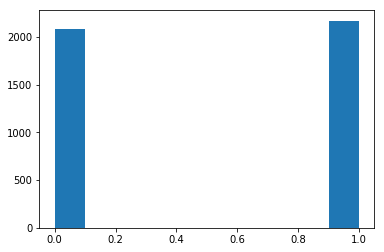

In [9]:
plt.hist(labels)

In [10]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 2089, 1: 2172}

# Saving the final datasets into files

In [11]:
np.savetxt("../datasets/final-data/features.csv", means_array, delimiter=",")
np.savetxt("../datasets/final-data/labels.csv", labels, delimiter=",")